# <span style='background :yellow' > ***The Spark Foundation - Task-1*** </span>

##  ***Prediction using supervised learning ,Predict the percentage of an student based on the no. of study hours.***

### ***Import The Required Libraries***

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### ***Reading The CSV file***

In [2]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### ***Checking how many null values are there in dataset***

In [3]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

### ***Descriptive analysis of the dataset using describe function***

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### ***information about the dataset***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### ***Plotting a scatter plot showing relationship between No of Hours vs scores***  

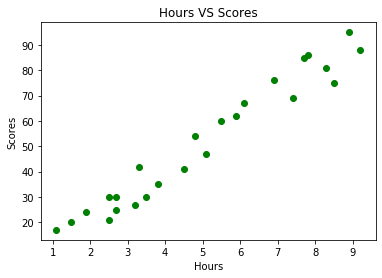

In [6]:
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours VS Scores')
plt.scatter(df.Hours,df.Scores,color='green')
plt.show()

### ***Two variables for the regression***

In [10]:
x=np.array(df.Hours)
y=np.array(df.Scores)

### ***Reshaping the numpy array for vertical output***

In [14]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

### ***Splitting the data into test data and train data***

In [16]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### ***Calling the linear function and reshaping all the data and fitting it to the model***

In [39]:
reg=LinearRegression()
X_test=X_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### ***Formula of simple linear regression***

In [40]:
line1=reg.coef_*X_train+reg.intercept_

### ***Plotting a scatter plot for training dataset***

Text(0.5, 1.0, 'TRAINING DATA')

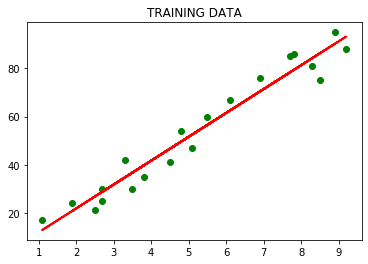

In [41]:
plt.scatter(X_train,y_train,color='green')
plt.plot(X_train,line1,color='red',linewidth=2)
plt.title('TRAINING DATA')

In [44]:
line2=reg.coef_*X_test+reg.intercept_

### ***Plotting  a scatter plot for testing dataset***

Text(0.5, 1.0, 'TESTING DATA')

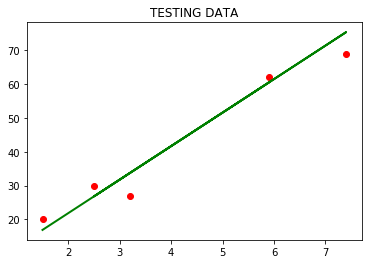

In [45]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,line2,color='green',linewidth=2)
plt.title('TESTING DATA')

### ***predicting the test value***

In [49]:
y_predict=reg.predict(X_test)
y_predict

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

### ***Comparing the actuals with the prediction to see the difference***

In [56]:
a=y_test.flatten()
b=y_predict.flatten()
compare={"ACTUAL":a,"prediction":b}
label={0,1,2,3,4}
print("Comparing the actuals with prediction: ")
df=pd.DataFrame(compare,index=label)
df


Comparing the actuals with prediction: 


,ACTUAL,prediction
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### ***Evaluating the model***
#### ***Evaluation is a very impotant step for knowing the accuracy of the model  by using MAE***

In [69]:
mae=mean_absolute_error(y_test,y_predict)
mae

4.183859899002975

## ***prediction***
### ***What will be predicted score if a student studies for 9.25 hrs/ day?***

In [71]:
data_predict=reg.predict([[9.25]])
data_predict

array([[93.69173249]])